# Zoo Dataset Classification using Neural Networks

### Importing the libraries

In [69]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import sys
from sklearn.metrics import classification_report
import keras
from keras.models import Sequential
from keras.layers import Dense

### Feature Names from zoo.names file


In [10]:
cols = ['animal_name','hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','class_type']

In [26]:
zoo = pd.read_csv("zoo.data", header = None, names=cols)
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [49]:
cols_Y = ['class_type']

In [12]:
print("This ZOO dataset is consised of",len(zoo),"rows.")

This ZOO dataset is consised of 101 rows.


## Visualizing the dataset

### Plotting count vs class type

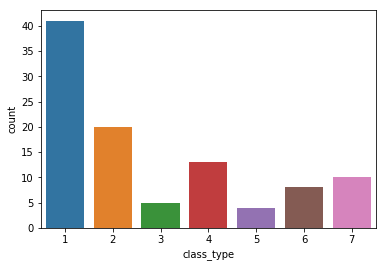

In [13]:
sns.countplot(zoo['class_type'],label="Count")

### Plotting the Correlation Matrix
A correlation matrix shows correlation coefficients between variables i.e dependency between multiple variables at the same time. 

Text(0.5,1.05,'Correlation of ZOO Features')

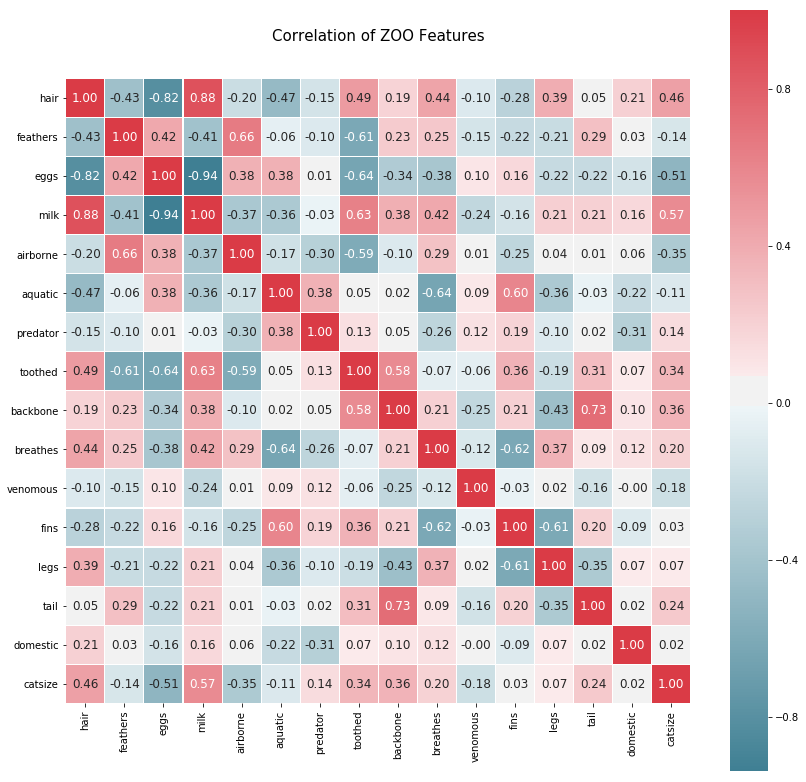

In [14]:
corr = zoo.iloc[:,1:-1].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of ZOO Features', y=1.05, size=15)

### Plotting the densities

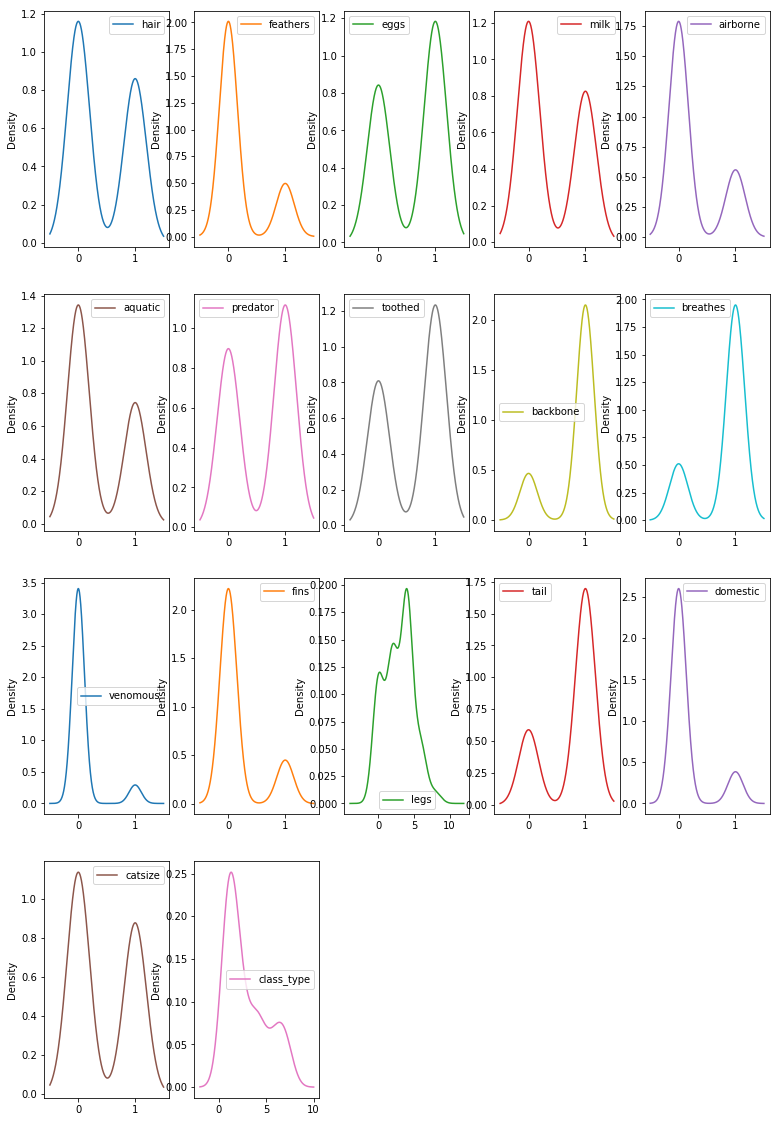

In [15]:
zoo.plot(kind='density', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

In [32]:
X = zoo.iloc[:, 1:17].values
y = zoo.iloc[:, -1].values

#### Making legs categorical(One hot encoding)

In [33]:
# Make number of legs values between 0 & 5
y[:][y[:]==7]=int(0)
X[:,12][X[:,12]==2]=int(1)
X[:,12][X[:,12]==4]=int(2)
X[:,12][X[:,12]==6]=int(3)
X[:,12][X[:,12]==8]=int(4)

y_som = y

In [34]:
# Categorize leg feature
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [0])
X12 = onehotencoder.fit_transform(X[:, 12].reshape(-1, 1)).toarray()
y = onehotencoder.fit_transform(y.reshape(-1,1)).toarray()

y = np.asarray(y, dtype = int)
X12 = np.asarray(X12, dtype = int)
Xnew = np.append(X, X12, axis=1)
X = np.delete(Xnew, 12, axis=1)

In [40]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Creating the Neural Network using Keras

### Architecture

1. Input Layer
2. Hidden Layer 1
3. Hidden Layer 2
4. Output Layer

In [41]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Using an Artificial Neural Network to categorize the data

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu', input_dim = 21))

# Adding the second hidden layer
classifier.add(Dense(units = 21, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'softmax'))

# Compiling the ANN
classifier.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 200)


Epoch 1/200
80/80 [==============================] - 1s 7ms/step - loss: 1.9409 - acc: 0.3750
Epoch 2/200
80/80 [==============================] - 0s 300us/step - loss: 1.9295 - acc: 0.4250
Epoch 3/200
80/80 [==============================] - 0s 400us/step - loss: 1.9172 - acc: 0.4250
Epoch 4/200
80/80 [==============================] - 0s 350us/step - loss: 1.9018 - acc: 0.4250
Epoch 5/200
80/80 [==============================] - 0s 250us/step - loss: 1.8791 - acc: 0.4250
Epoch 6/200
80/80 [==============================] - 0s 350us/step - loss: 1.8493 - acc: 0.4250
Epoch 7/200
80/80 [==============================] - 0s 400us/step - loss: 1.8098 - acc: 0.4250
Epoch 8/200
80/80 [==============================] - 0s 350us/step - loss: 1.7614 - acc: 0.4250
Epoch 9/200
80/80 [==============================] - 0s 250us/step - loss: 1.7063 - acc: 0.4250
Epoch 10/200
80/80 [==============================] - 0s 300us/step - loss: 1.6483 - acc: 0.4250
Epoch 11/200
80/80 [=====================

80/80 [==============================] - 0s 250us/step - loss: 0.3322 - acc: 0.8500
Epoch 86/200
80/80 [==============================] - 0s 200us/step - loss: 0.3268 - acc: 0.8500
Epoch 87/200
80/80 [==============================] - 0s 250us/step - loss: 0.3217 - acc: 0.8625
Epoch 88/200
80/80 [==============================] - 0s 250us/step - loss: 0.3156 - acc: 0.8625
Epoch 89/200
80/80 [==============================] - 0s 250us/step - loss: 0.3097 - acc: 0.8625
Epoch 90/200
80/80 [==============================] - 0s 250us/step - loss: 0.3047 - acc: 0.8750
Epoch 91/200
80/80 [==============================] - 0s 250us/step - loss: 0.2999 - acc: 0.8750
Epoch 92/200
80/80 [==============================] - 0s 300us/step - loss: 0.2947 - acc: 0.8750
Epoch 93/200
80/80 [==============================] - 0s 350us/step - loss: 0.2907 - acc: 0.8750
Epoch 94/200
80/80 [==============================] - 0s 400us/step - loss: 0.2851 - acc: 0.8750
Epoch 95/200
80/80 [=======================

80/80 [==============================] - 0s 200us/step - loss: 0.0700 - acc: 0.9750
Epoch 169/200
80/80 [==============================] - ETA: 0s - loss: 0.0727 - acc: 1.000 - 0s 300us/step - loss: 0.0686 - acc: 0.9750
Epoch 170/200
80/80 [==============================] - 0s 250us/step - loss: 0.0671 - acc: 0.9750
Epoch 171/200
80/80 [==============================] - 0s 250us/step - loss: 0.0647 - acc: 0.9750
Epoch 172/200
80/80 [==============================] - 0s 250us/step - loss: 0.0642 - acc: 0.9875
Epoch 173/200
80/80 [==============================] - 0s 300us/step - loss: 0.0610 - acc: 0.9875
Epoch 174/200
80/80 [==============================] - 0s 400us/step - loss: 0.0603 - acc: 0.9875
Epoch 175/200
80/80 [==============================] - 0s 400us/step - loss: 0.0585 - acc: 0.9875
Epoch 176/200
80/80 [==============================] - 0s 250us/step - loss: 0.0557 - acc: 0.9875
Epoch 177/200
80/80 [==============================] - 0s 250us/step - loss: 0.0565 - acc: 0.9

In [53]:
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

y_pred_cat = np.argmax(y_pred, axis=1)
y_pred_test_cat = np.argmax(y_pred_test, axis=1)

y_train_cat = np.argmax(y_train, axis=1)
y_test_cat = np.argmax(y_test, axis=1)

#Making the Confusion Matrix (compares actual values with predictions)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_cat, y_pred_cat)
cm_test = confusion_matrix(y_test_cat, y_pred_test_cat)
# plot_confusion_matrix(confusion_matrix, classes=cols_Y)

print(cm)
print(cm_test)

[[ 8  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0]
 [ 0  0 16  0  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  8  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  6]]
[[2 0 0 0 0 0]
 [0 7 0 0 0 0]
 [0 0 4 0 0 0]
 [0 0 0 5 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 2]]


In [43]:
cm_count=0
cm_wrong=0
for i in range(len(cm)):
    cm_count += cm[i,i]
    for v in range(len(cm)):
        cm_wrong += cm[i,v]
cm_wrong -= cm_count
    
cm_test_count=0
cm_test_wrong=0
for i in range(len(cm_test)):
    cm_test_count += cm_test[i,i]
    for v in range(len(cm_test)):
        cm_test_wrong += cm_test[i,v]
cm_test_wrong -= cm_test_count

accuracy = cm_count/(cm_count + cm_wrong)
accuracy_test = cm_test_count/(cm_test_count + cm_test_wrong)

print(accuracy)
print(accuracy_test)

1.0
1.0


### Classification Report - Test Data

In [63]:
print(classification_report(y_train_cat, y_pred_cat))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      1.00      1.00        34
          2       1.00      1.00      1.00        16
          3       1.00      1.00      1.00         5
          4       1.00      1.00      1.00         8
          5       1.00      1.00      1.00         3
          6       1.00      1.00      1.00         6

avg / total       1.00      1.00      1.00        80



### Classification Report - Test Data

In [64]:
print(classification_report(y_test_cat, y_pred_test_cat))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         2
          1       1.00      1.00      1.00         7
          2       1.00      1.00      1.00         4
          4       1.00      1.00      1.00         5
          5       1.00      1.00      1.00         1
          6       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00        21

